In [9]:
import sys
import os
import logging
 
# Add the project root directory to Python path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '..')))
from src.playstore_scraper import PlayStoreScraper
from src.review_preprocessor import ReviewPreprocessor
import pandas as pd
import logging
%reload_ext autoreload
%autoreload 2 


# Scrapping data from playstore


In [11]:
scraper = PlayStoreScraper()
reviews_by_bank = scraper.scrape_all()


2025-06-10 13:40:03,217 - INFO - Scraping reviews for cbe
2025-06-10 13:40:07,648 - INFO - Successfully fetched 600 reviews for com.combanketh.mobilebanking
2025-06-10 13:40:07,991 - INFO - Scraping reviews for boe
2025-06-10 13:40:11,396 - INFO - Successfully fetched 600 reviews for com.boa.boaMobileBanking
2025-06-10 13:40:11,432 - INFO - Scraping reviews for dashen
2025-06-10 13:40:13,902 - INFO - Successfully fetched 452 reviews for com.dashen.dashensuperapp


In [20]:
 # Initialize and run preprocessor
preprocessor = ReviewPreprocessor()


In [21]:
preprocessor.process_all_banks()

2025-06-10 13:50:03,396 - INFO - Saved 596 processed reviews for boe
2025-06-10 13:50:03,583 - INFO - Saved 600 processed reviews for cbe
2025-06-10 13:50:03,824 - INFO - Saved 406 processed reviews for dashen


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.sentiment_analyzer import SentimentAnalyzer
from src.theme_analyzer import ThemeAnalyzer


In [24]:
from src.review_preprocessor import ReviewPreprocessor

preprocessor = ReviewPreprocessor()
preprocessor.process_all_banks()

2025-06-10 14:04:31,591 - INFO - Saved 596 processed reviews for boe
2025-06-10 14:04:31,778 - INFO - Saved 600 processed reviews for cbe
2025-06-10 14:04:31,804 - INFO - Saved 406 processed reviews for dashen


In [26]:
analyzed_data = pd.read_csv('../data/analyzed_reviews.csv')

analyzed_data.head(20)

,review_text,rating,date,bank_name,source,sentiment_label,sentiment_score,keywords
0,"I have a fitayah account, a type of interest f...",1,2024-02-18,boe,google_play,NEGATIVE,0.999777,fitayah account type interest account system p...
1,Can you please just make it functional. I dont...,1,2024-04-15,boe,google_play,NEGATIVE,0.928859,functionality works aestheticaly nice loading ...
2,Developers the company takes too long to updat...,2,2024-05-03,boe,google_play,NEGATIVE,0.999800,developers company app process app money accou...
3,This app is a joke. It crashes more than it wo...,1,2025-05-21,boe,google_play,NEGATIVE,0.999194,app joke features point money balance develope...
4,"Hello, Im facing a problem with the BOA Mobile...",1,2025-06-03,boe,google_play,NEGATIVE,0.999369,problem boa mobile app time phone number passw...
5,It keeps showing this pop up to turn off devel...,1,2025-04-19,boe,google_play,NEGATIVE,0.999669,pop developer options tho experience fix asap
6,"Edit New bug, app not letting me type in my ot...",1,2025-03-12,boe,google_play,NEGATIVE,0.997308,edit new bug app codes app developer options d...
7,i entered incorrect security question by mista...,5,2025-05-10,boe,google_play,NEGATIVE,0.999242,security question mistake boa app lock pin opt...
8,I dont know what is wrong with BOA as a bank i...,1,2024-08-03,boe,google_play,NEGATIVE,0.999820,boa bank year app disaster way transactions sc...
9,Whats wrong with App. this days? it doesnt wor...,2,2024-05-08,boe,google_play,NEGATIVE,0.999701,app days slow time screen app issues app


# Task 2

Device set to use cpu
2025-06-09 07:13:39,574 - INFO - Sentiment analyzer initialized successfully



Sentiment Analysis Summary:
---------------------------
Total reviews analyzed: 1602

Sentiment distribution:
sentiment_label
NEGATIVE    1001
POSITIVE     601
Name: count, dtype: int64


Text(0, 0.5, 'Number of Reviews')

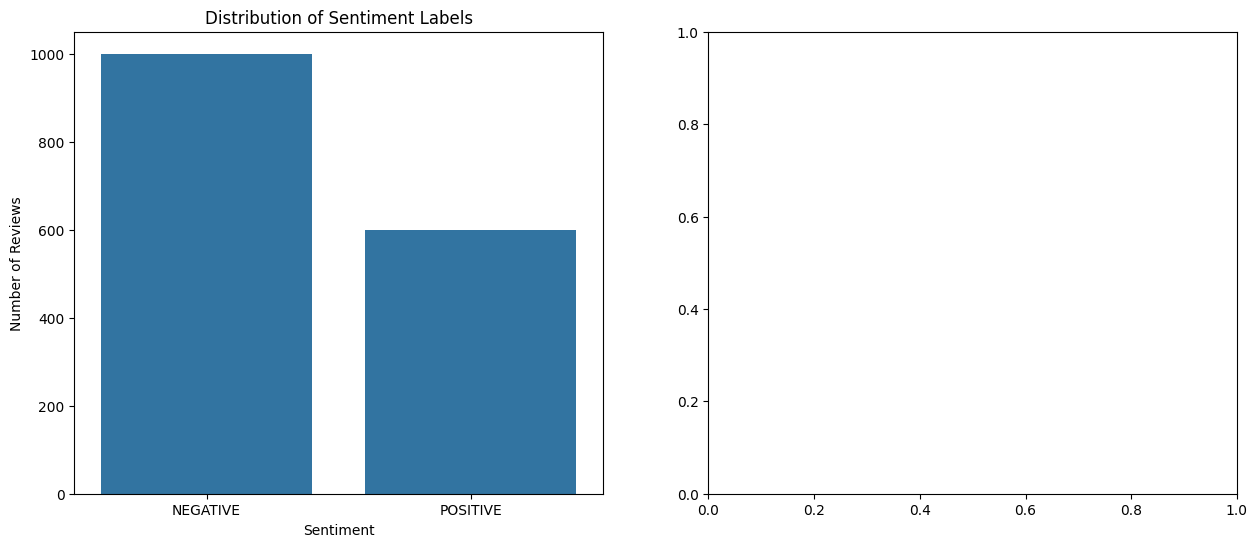

In [15]:
# Initialize sentiment analyzer
sentiment_analyzer = SentimentAnalyzer()

# Load processed reviews
preprocessor = ReviewPreprocessor()
df = preprocessor.load_data()

# Analyze sentiment for all reviews
df_with_sentiment, agg_sentiment = sentiment_analyzer.analyze_reviews(df)

# Display summary of sentiment analysis
print("\nSentiment Analysis Summary:")
print("---------------------------")
print(f"Total reviews analyzed: {len(df_with_sentiment)}")
print("\nSentiment distribution:")
print(df_with_sentiment['sentiment_label'].value_counts())
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Sentiment Distribution
sentiment_counts = df_with_sentiment['sentiment_label'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=ax1)
ax1.set_title('Distribution of Sentiment Labels')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Number of Reviews')







In [ ]:
# Display average sentiment scores by bank
print("\nAverage sentiment scores by bank:")
print(agg_sentiment.groupby('bank_name').mean())



Average sentiment scores by bank:
bank_name
boe       0.975121
cbe       0.973501
dashen    0.981897
Name: sentiment_score, dtype: float64


<Figure size 640x480 with 0 Axes>

2025-06-09 07:04:48,753 - INFO - Theme analyzer initialized successfully



Theme Analysis Summary:
----------------------

boe:
  Transaction: money, transaction
  UI/UX: app, application, banking app, apps
  Support: service
  Performance: error

cbe:
  Account Access: account
  Transaction: transaction, transactions, money, transfer
  UI/UX: app, application
  Performance: error

dashen:
  Account Access: account
  Transaction: transactions, transaction
  UI/UX: app, application, super app, banking app
  Support: services


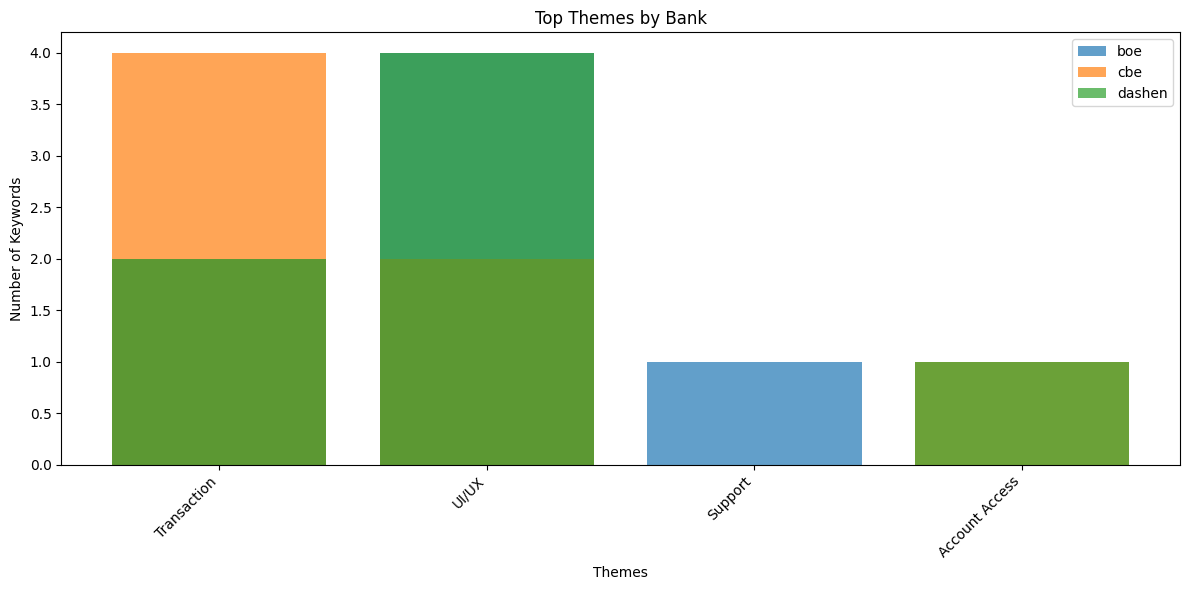

In [12]:
# Initialize theme analyzer
theme_analyzer = ThemeAnalyzer()

# Analyze themes for all reviews
themes_by_bank = theme_analyzer.identify_themes(df_with_sentiment)

# Display theme analysis summary
print("\nTheme Analysis Summary:")
print("----------------------")
for bank, themes in themes_by_bank.items():
    print(f"\n{bank}:")
    for theme, keywords in themes.items():
        print(f"  {theme}: {', '.join(keywords[:5])}")

# Visualize top themes by bank
plt.figure(figsize=(12, 6))
for bank, themes in themes_by_bank.items():
    # Get top 3 themes for each bank
    top_themes = list(themes.keys())[:3]
    theme_counts = [len(keywords) for keywords in themes.values()][:3]
    
    plt.bar(top_themes, theme_counts, label=bank, alpha=0.7)

plt.title('Top Themes by Bank')
plt.xlabel('Themes')
plt.ylabel('Number of Keywords')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# Task-3

In [31]:
# Import the required module
import scripts.database_setup  as store_reviews

# Create a database connection
connection = store_reviews.create_connection()

# Create the tables
store_reviews.create_tables(connection)

# Insert banks into the database
store_reviews.insert_banks(connection)

# Insert reviews for each bank
store_reviews.insert_reviews(connection, store_reviews.CBE_PATH, 'CBE')
store_reviews.insert_reviews(connection, store_reviews.BOE_PATH, 'BOE')
store_reviews.insert_reviews(connection, store_reviews.DASHEN_PATH, 'Dashen')

# Close the connection
if connection:
    connection.close()
    print("Database connection closed.")

Database connection established.
Banks table created successfully.
Reviews table created successfully.
Inserted 3 banks into the database.
Inserted 600 reviews for CBE into the database.
Inserted 596 reviews for BOE into the database.
Inserted 406 reviews for Dashen into the database.
Database connection closed.


# Task - 4

In [3]:
clean_df = pd.read_csv('../data/analyzed_reviews.csv')

In [4]:
clean_df.head(20)

,review_text,rating,date,bank_name,source,sentiment_label,sentiment_score,keywords
0,"I have a fitayah account, a type of interest f...",1,2024-02-18,boe,google_play,NEGATIVE,0.999777,fitayah account type interest account system p...
1,Can you please just make it functional. I dont...,1,2024-04-15,boe,google_play,NEGATIVE,0.928859,functionality works aestheticaly nice loading ...
2,Developers the company takes too long to updat...,2,2024-05-03,boe,google_play,NEGATIVE,0.999800,developers company app process app money accou...
3,This app is a joke. It crashes more than it wo...,1,2025-05-21,boe,google_play,NEGATIVE,0.999194,app joke features point money balance develope...
4,"Hello, Im facing a problem with the BOA Mobile...",1,2025-06-03,boe,google_play,NEGATIVE,0.999369,problem boa mobile app time phone number passw...
5,It keeps showing this pop up to turn off devel...,1,2025-04-19,boe,google_play,NEGATIVE,0.999669,pop developer options tho experience fix asap
6,"Edit New bug, app not letting me type in my ot...",1,2025-03-12,boe,google_play,NEGATIVE,0.997308,edit new bug app codes app developer options d...
7,i entered incorrect security question by mista...,5,2025-05-10,boe,google_play,NEGATIVE,0.999242,security question mistake boa app lock pin opt...
8,I dont know what is wrong with BOA as a bank i...,1,2024-08-03,boe,google_play,NEGATIVE,0.999820,boa bank year app disaster way transactions sc...
9,Whats wrong with App. this days? it doesnt wor...,2,2024-05-08,boe,google_play,NEGATIVE,0.999701,app days slow time screen app issues app


Data loaded successfully.


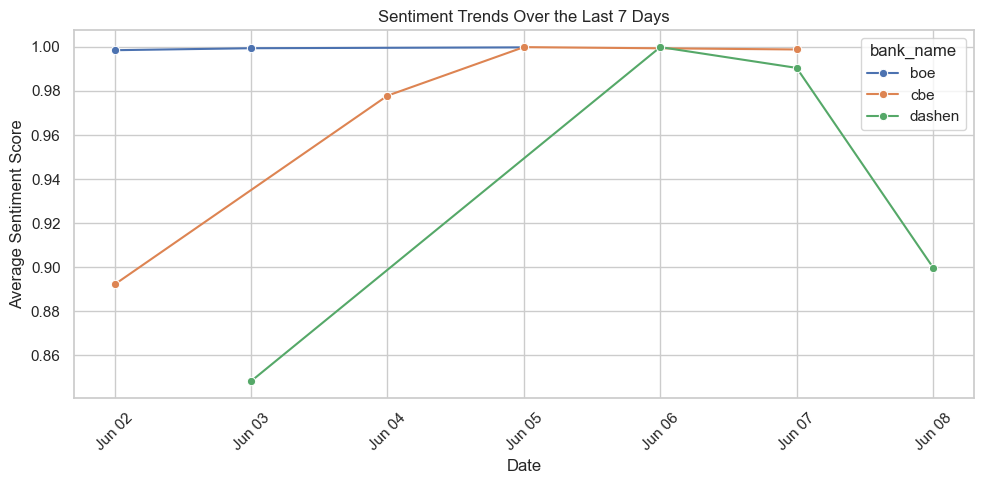

7-day sentiment trends plot created successfully.


In [10]:
# Import the visualization module
from src.visualization import  Visualization as viz

# Load the processed reviews data
file_path = '../data/analyzed_reviews.csv'
df = viz.load_data(file_path)

# Call the plotting functions
viz.plot_sentiment_trends(df)


2025-06-10 23:58:37,195 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-10 23:58:37,205 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


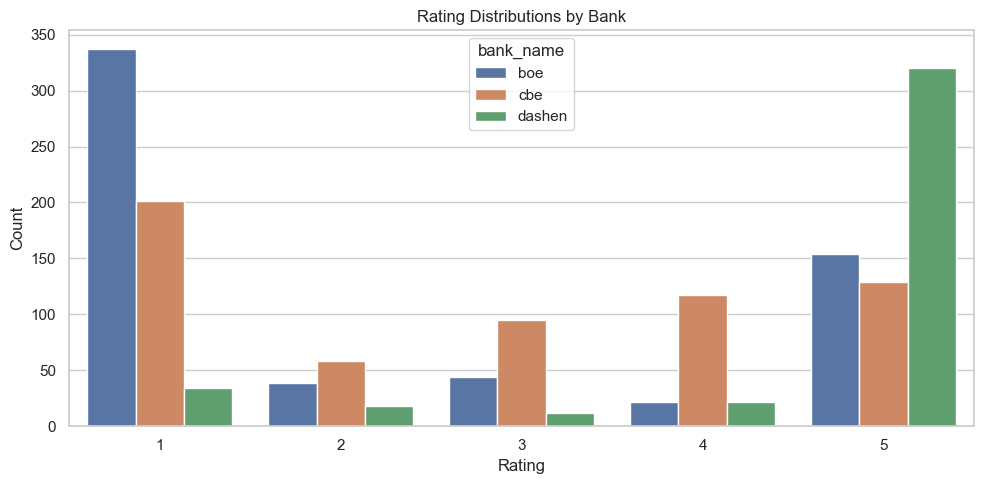

Rating distributions plot created successfully.


In [3]:
viz.plot_rating_distributions(df)


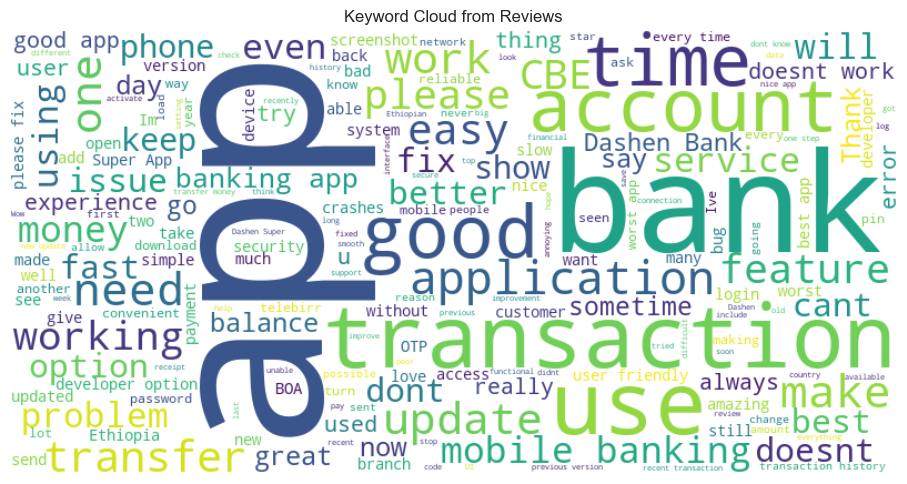

Keyword cloud plot created successfully.


In [4]:
viz.plot_keyword_cloud(df)